Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$

## Aluno:  Luiz Eduardo Hupalo 17203887



# Tarefa 2: Regressão Linear

# Conjunto de dados

Para facilitar a análise, o conjunto de dados utilizado neste exercício possui um único atributo $x \in \RR$ (e um valor-alvo $y \in \RR$). Além desta peculiaridade, é importante ressaltar duas grandes diferenças em relação ao que se encontra em problemas reais:
- O conjunto de dados é sintético, isto é, gerado por simulação;
- O conjunto de treinamento tem tamanho **muito menor** que os conjuntos de validação e teste.

A razão para esta escolha é que um conjunto de treinamento pequeno nos permitirá observar mais facilmente o fenômeno de overfitting, enquanto conjuntos de validação e teste suficientemente grandes nos permitirá ter confiança na estimativa de desempenho do modelo medida nestes conjuntos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gen_data(n_samples, x_scale=[0,1], noise=0.5):
    '''Generate univariate regression dataset'''
    x = np.sort(np.random.rand(n_samples))
    y = 6*(-1/6 + x + (x > 1/3)*(2/3-2*x) + (x > 2/3)*(2*x-4/3)) + noise*np.random.randn(n_samples)
    x = x_scale[0] + (x_scale[1]-x_scale[0])*x
    X = x.reshape(-1,1)
    return X, y

def plot_data(X, y):
    '''Plot univariate regression dataset'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    return

def plot_prediction(model, X, y, n_points=100):
    '''Plot dataset and predictions for a univariate regression model'''
    plot_data(X,y)
    if n_points is not None:
        xx = np.linspace(X.min(),X.max(),n_points)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    y_pred = model.predict(X)
    plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

Gerando o conjunto de dados:

(30, 1) (30,)
(1000, 1) (1000,)
(1000, 1) (1000,)


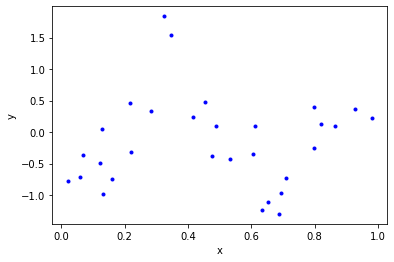

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2019*2)
X, y = gen_data(n_samples=30)
X_val, y_val = gen_data(n_samples=1000)
X_test, y_test = gen_data(n_samples=1000)

print(X.shape, y.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Plot only the training data!
plot_data(X,y)

# Regressão linear simples


- Treine um modelo de regressão linear simples, $\hat{y} = w_0 + w_1 x$, sobre o conjunto de treinamento
- Calcule o erro quadrático médio (MSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste
- Trace o gráfico da predição sobre o conjunto de treinamento
- Você diria que o modelo treinado está sofrendo de underfitting, overfitting ou nenhum dos dois? Explique.
- (OPCIONAL) Experimente também a função `model.score()` do sklearn. Qual a relação entre este valor e o MSE? É possível calcular um a partir do outro? Como?

#### Funções úteis:
```python
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
plot_prediction() # fornecida acima
```

Treinando o modelo e plotando seu resultado:

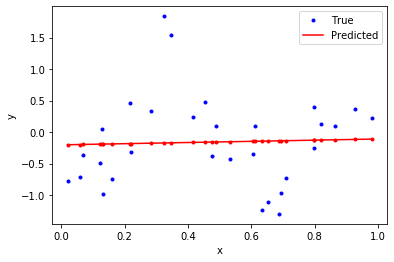

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X,y)
plot_prediction(model,X,y)


MSE no conjunto de treinamento:

In [4]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mean_squared_error(y,y_pred)

0.517264352011368

MSE no conjunto de teste:

In [5]:
y_predt = model.predict(X_test)
mean_squared_error(y_test,y_predt)

0.5981907941434731

Plot da predição para o conjunto de teste:

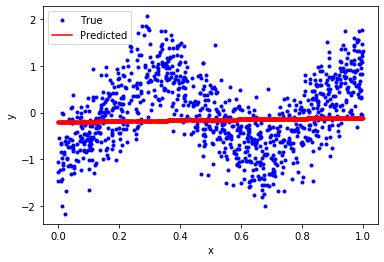

In [6]:
plot_prediction(model,X_test,y_test)

Nota-se pelo gráfico acima que o modelo não representa o conjunto de dados, havendo underfitting.

# Adicionando atributos (regressão linear com múltiplas variáveis)

Agora, estenderemos o modelo de regressão linear adicionando atributos polinomiais de grau até $d$, isto é, o modelo será dado por $\hat{y} = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d$. Note que esse modelo possui um hiperparâmetro, $d$, que precisa ser determinado. **A boa prática recomenda nunca utilizar o conjunto de teste até que todos os hiperparâmetros sejam escolhidos**, utilizando, ao invés disso, o conjunto de validação.

- Adicione atributos polinomiais ao modelo de regressão linear, escolha algum valor de $d$ e treine o modelo
- Calcule o erro quadrático médio (MSE) da predição sobre o conjunto de treinamento e sobre o **conjunto de validação**
- Trace o gráfico da predição sobre o conjunto de treinamento
- Repita os passos acima experimentando outros valores de $d$. O que você observa?
- Especificamente, para o caso $d=12$, você diria que o modelo está sofrendo de underfitting, overfitting ou nenhum dos dois?

#### Funções úteis:
```python
sklearn.preprocessing.PolynomialFeatures()
sklearn.pipeline.make_pipeline()
```

Treinando o modelo para $d = 2$:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Xa_t = X
ya_t = y

Xa_val = X_val
ya_val = y_val

Xa_test = X_test
ya_test = y_test

polynomial_features = PolynomialFeatures(degree = 2)
model = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features), ("model", model)])
pipeline.fit(Xa_t.reshape(-1,1),ya_t)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Calculando o MSE sobre o conjunto de treinamento:

In [8]:
y_pl = pipeline.predict(Xa_t.reshape(-1,1))

mean_squared_error(ya_t,y_pl)

0.5119957696213475

Calculando o MSE sobre o conjunto de validação:

In [9]:
y_pl = pipeline.predict(Xa_val.reshape(-1,1))

mean_squared_error(ya_val,y_pl)

0.6118028788933288

Gráfico da predição sobre o conjunto de treinamento:

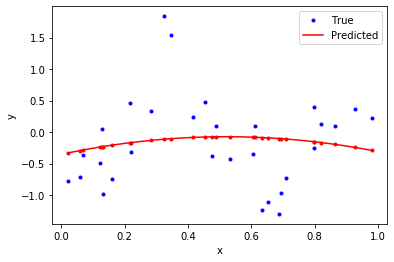

In [10]:
plot_prediction(pipeline,X.reshape(-1,1),y)

Para valores de $d$ muito baixos, ocorre o underfitting. Para valores de $d$ muito altos, ocorre o overfitting. Realizando os procedimentos para $d = 12$:

In [11]:
polynomial_features = PolynomialFeatures(degree = 12)
model = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features), ("model", model)])
pipeline.fit(Xa_t.reshape(-1,1),ya_t)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=12, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

MSE sobre o conjunto de treinamento:

In [12]:
y_pl = pipeline.predict(Xa_t.reshape(-1,1))

mean_squared_error(ya_t,y_pl)

0.10896246759918281

MSE sobre o conjunto de validação:

In [13]:
y_pl = pipeline.predict(Xa_val.reshape(-1,1))

mean_squared_error(ya_val,y_pl)

0.6767746319590603

Gráfico da predição sobre o conjunto de treinamento:

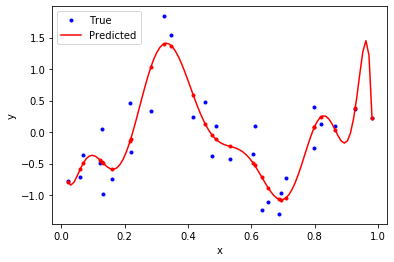

In [14]:
plot_prediction(pipeline,Xa_t.reshape(-1,1),ya_t)

Gráfico da predição sobre o conjunto de validação:

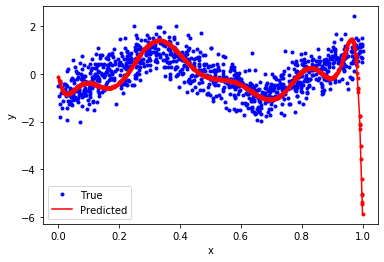

In [15]:
plot_prediction(pipeline,Xa_val.reshape(-1,1),ya_val)

Pode-se observar que o MSE sobre o conjunto de treinamento diminui, porém aumenta quando calculado sobre o conjunto de validação, aumenta. Este é um problema que se enfrenta quando há poucos dados para treinar o modelo. Portanto, para $d = 12$ o modelo sofre de overfitting.

## Busca de hiperparâmetros

- Trace um gráfico do MSE de treinamento e de validação em função do grau $d$. Se necessário, ajuste a escala vertical para melhor visualização.
- Comente sobre o que você observa no gráfico. Em particular, explique o comportamento das duas curvas e por que esse comportamento era esperado.
- Determine o valor de $d$ que minimiza o erro no conjunto de validação.
- Para este valor de $d$, calcule o MSE de treinamento, de validação **e de teste** e trace o gráfico da predição sobre o conjunto de treinamento.
- (OPCIONAL) O erro de validação parece representativo do erro de teste? O que você acha que aconteceria se o conjunto de validação fosse significativamente menor (por exemplo, com 30 amostras ao invés de 1000)?

#### Funções úteis:
```python
np.arange()
np.zeros() # útil para pré-alocação de vetores
for i in range(len(v)): # percorre os elementos de v
plt.ylim()
np.argmin()
```

Gráfico MSE vs d para o conjunto de treinamento e validação:

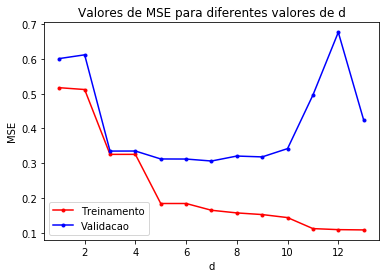

In [16]:
n = 13
degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13]
mse_trein = np.zeros(n)
mse_val = np.zeros(n)

for i in range(len(degrees)):

    poly = PolynomialFeatures(degree=degrees[i])
    model = LinearRegression()
    pipeline = Pipeline([("poly", poly), ("model", model)])
    pipeline.fit(Xa_t.reshape(-1,1), ya_t)

    y_pltrein = pipeline.predict(Xa_t.reshape(-1,1))
    y_plval = pipeline.predict(Xa_val.reshape(-1,1))
    
    mse_val[i] = mean_squared_error(ya_val,y_plval)
    mse_trein[i] = mean_squared_error(ya_t,y_pltrein)

plt.title("Valores de MSE para diferentes valores de d")
plt.plot(degrees, mse_trein, '.-b', color = 'red', label="Treinamento")
plt.plot(degrees, mse_val, '.-b', color = 'blue', label="Validacao")
plt.xlabel("d")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

Nota-se que quanto maior o valor de $d$, menor será o MSE para o conjunto de treinamento e maior será o MSE para o conjunto de validação. Isso acontece porque existem poucos dados no conjunto de treinamento, causando overfitting a medida que $d$ aumenta.

O que se pode ver é que para $d = 7$ o MSE é mínimo para o conjunto de validação.

In [17]:
np.argmin(mse_val)

6

O índice retornado pela linha acima é 6 pelo fato de que o gráfico é plotado de 1 a 13, mas o index do vetor mse_val (que equivale a $d$) vai de 0 a 12.

In [18]:
mse_val[6]

0.30634855220143453

MSE para o conjunto de treinamento com $d = 7$:

In [19]:
poly = PolynomialFeatures(degree = 7) 
model = LinearRegression()
pipeline = Pipeline([("poly", poly), ("model", model)])
pipeline.fit(Xa_t.reshape(-1,1), ya_t)

y_pred = pipeline.predict(Xa_t)
mean_squared_error(ya_t,y_pred)

0.1646888948147033

MSE para o conjunto de validação com $d = 7$:

In [20]:
y_pred = pipeline.predict(Xa_val)
mean_squared_error(ya_val,y_pred)

0.30634855220143453

MSE para o conjunto de teste com $d = 7$:

In [21]:
y_pred = pipeline.predict(Xa_test)
mean_squared_error(ya_test,y_pred)

0.29857411707736603

Gráfico da predição sobre o conjunto de treinamento:

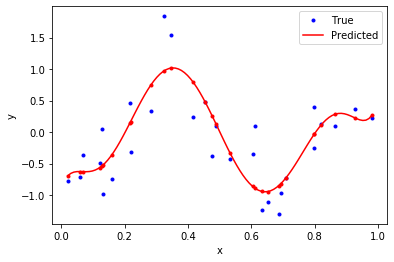

In [22]:
plot_prediction(pipeline,Xa_t,ya_t)

# Regularização

Agora, adicionaremos regularização $\ell_2$ ao modelo, o que introduz mais um hiperparâmetro, o parâmetro de regularização $\lambda$.

- Retornando ao modelo com $d=12$, agora com regularização $\ell_2$ (_ridge regression_), experimente alguns valores de $\lambda$ e observe os resultados no gráfico da predição sobre o conjunto de treinamento. (Você logo perceberá a necessidade de usar $\lambda \ll 1$.) Em particular, o que acontece quando $\lambda$ é comparativamente grande?
- Trace um gráfico do MSE de treinamento e de validação em função de $\log \lambda$.
- Comente sobre o que você observa no gráfico. Em particular, explique o comportamento das duas curvas e por que esse comportamento era esperado.
- Determine o valor de $\lambda$ que minimiza o erro no conjunto de validação.
- Para este valor de $\lambda$, calcule o MSE de treinamento, de validação e de teste e trace o gráfico da predição sobre o conjunto de treinamento.
- A partir destes resultados, comente sobre o efeito da regularização em um modelo com capacidade elevada comparativamente ao tamanho do conjunto de treinamento.
- (OPCIONAL) O que você acha que ocorreria se o conjunto de treinamento fosse relativamente grande (por exemplo, com 1000 amostras ao invés de 30)? Ainda seria importante regularizar?

#### Dicas

- Não utilize `lambda` como nome de variável, pois no Python `lambda` é uma palavra reservada (operador para criar funções anônimas). Uma sugestão é abreviar para `lamb`.

#### Funções úteis:
```python
sklearn.linear_model.Ridge()
np.linspace()
np.exp()
np.log()
```
Note que a função `Ridge()` utiliza `alpha` (ao invés de $\lambda$) como parâmetro de regularização.

Treinando um modelo com $d = 12$ e aplicando regularização Ridge com $\lambda = 1\times10^{-6}$:

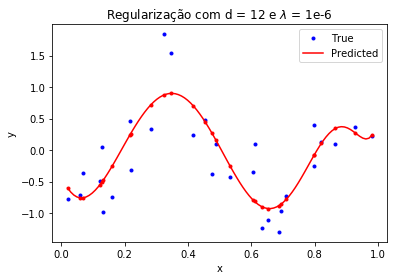

In [23]:
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree = 12)

ridge = Pipeline([("poly", poly), ("Ridge", Ridge(alpha = 0.000001))])

ridge.fit(Xa_t,ya_t)

plot_prediction(ridge,Xa_t,ya_t)
plt.title('Regularização com d = 12 e $\lambda$ = 1e-6')
plt.show()

Matematicamente, a regularização é uma forma de penalizar os parâmetros que atingirem valores muito altos. A função custo $J(\mathbf{w})$ com regularização Ridge, diferentemente da regressão sem regularização, possui uma função $\Omega (\mathbf{w})$ que penaliza os parâmetros $\mathbf{w}$ com um parâmetro $\lambda$. Se $\lambda = 0$, temos uma regressão sem regularização; se $\lambda > 1$ ocorre underfitting, pois os parâmetros continuarão grandes; se $\lambda << 1$ os parâmetros são normalizados e o modelo melhora seu desempenho.



Gráfico da MSE em função de $\lambda$, para $d = 12$:

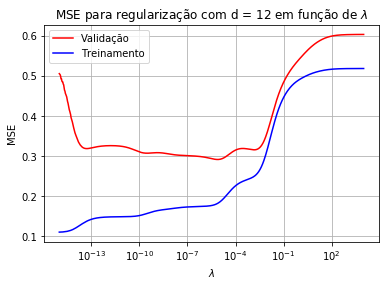

In [24]:
import warnings
warnings.filterwarnings('ignore')

alphas = np.logspace(-15, 4, num = 700, base = 10)
mse_trein = np.zeros(len(alphas))
mse_val = np.zeros(len(alphas))

for i in range(len(alphas)):
    
    ridge = Pipeline([("poly", poly), ("Ridge", Ridge(alpha = alphas[i]))])
    
    ridge.fit(Xa_t,ya_t)
    
    y_rtrein = ridge.predict(Xa_t.reshape(-1,1))
    y_rval = ridge.predict(Xa_val.reshape(-1,1))
    
    mse_val[i] = mean_squared_error(ya_val,y_rval)
    mse_trein[i] = mean_squared_error(ya_t,y_rtrein)

plt.title('MSE para regularização com d = 12 em função de $\lambda$')
plt.semilogx(alphas, mse_val, 'r', label='Validação')
plt.semilogx(alphas, mse_trein, 'b', label='Treinamento')
plt.legend(loc = "best")
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.grid()
plt.show()

Pelo gráfico acima é possível perceber que o MSE de ambos os conjuntos crescem conforme aumenta-se o valor de $\lambda$. 

O valor mínimo de $\lambda$ que minimiza o MSE no conjunto de validação é:

In [25]:
min(mse_val)
best_lda = alphas[np.argmin(mse_val)]
best_lda

7.836722666817381e-06

O MSE em todos os conjuntos, para $\lambda = 7.8367e-6$ é:

Valores do MSE para os três conjuntos: 

Treinamento: 0.18224953654418555

Validação: 0.29132671132441695

Teste: 0.28812800251737747


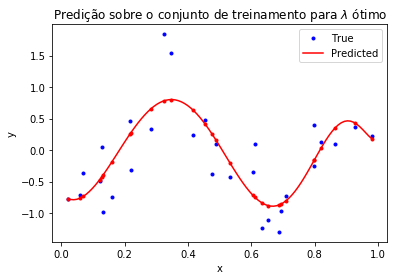

In [26]:
rr = Pipeline([("poly", poly), ("Ridge", Ridge(alpha = best_lda))])
    
rr.fit(Xa_t,ya_t)

mse_trein = mean_squared_error(ya_t, rr.predict(Xa_t))
mse_val = mean_squared_error(ya_val, rr.predict(Xa_val))
mse_test = mean_squared_error(ya_test, rr.predict(Xa_test))

print('Valores do MSE para os três conjuntos: \n')
print("Treinamento: " + str(mse_trein) + "\n")
print("Validação: " + str(mse_val) + "\n")
print("Teste: " + str(mse_test))

plt.title('Predição sobre o conjunto de treinamento para $\lambda$ ótimo')
plot_prediction(rr, Xa_t, ya_t)

Com a regularização foi possível fazer o MSE sobre o conjunto de teste diminuir de $0.2985$ com $d = 7$ para $0.2913$ com $d = 12$. Ou seja, com um regressor com ordem polinomial maior foi possível obter um resultado melhor do que o método sem regularização.

# Implementação em Python

Finalmente, você irá escrever sua própria implementação dos modelos acima, usando uma interface parcialmente compatível com a biblioteca `sklearn`. Além das funções `fit()` e `predict()`, a classe do modelo deverá conter uma função `mse()` para cálculo do MSE (ao invés da função `score()` do `sklearn`).

É suficiente implementar um modelo de regressão linear com atributos polinomiais de grau $d$ e regularização $\ell_2$ com parâmetro $\lambda$; caso se deseje um modelo sem atributos polinomiais (linear na variável de entrada) ou sem regularização, é suficiente fazer $d=1$ ou $\lambda=0$, respectivamente.

- Complete a classe abaixo, preenchendo as linhas indicadas (ou fique à vontade para reimplementar da forma que desejar).
- Teste-a com os comandos da célula seguinte, para garantir que sua implementação está correta.
- (OPCIONAL) Para este conjunto de dados, o que ocorre quando usamos $d \geq 10$ e $\lambda=0$? Por que isso ocorre? Isto deixa de ocorrer se usarmos $\lambda=10^{-12}$? Por quê?

#### Funções úteis:
```python
np.ones()
np.c_[]
np.diag()
np.r_[]
np.linalg.inv()
np.linalg.solve()
np.mean()
```

In [27]:
class Model():
   
    def __init__(self, d=1, lamb=0):
        
        self.d = d
        self.lamb = lamb
        return
    
    def add_powers(self, X):
        if self.d == 1:
            X_new = np.vstack(([1],X))
        
        if self.d >= 2:
            ones = np.ones(len(X))
            X_new = np.hstack((ones.reshape(-1,1), X))
            
            for i in range(1, self.d):
                pwr = np.power(X_new[:,i], i)
                X_new = np.hstack((X_new, pwr.reshape(-1,1)))
        
        return X_new
        
                               
    def fit(self, X, y):
        X = self.add_powers(X)
        L = np.identity(self.d+1)
        L[0][0] = 0
        assert np.linalg.matrix_rank(X.T @ X + self.lamb*L) == X.shape[1], 'Singular matrix'
        self.w = (np.linalg.inv((X.T @ X) + self.lamb*L) @ X.T) * y
        return

    def predict(self, X):
        X = self.add_powers(X)
        y_pred = self.w.T * X
        return y_pred
    
    def cost(w, X, y):
        J = (1/(2*X.shape[0]))*np.sum((predict(w,X)-y)**2)
        return J

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# scikit-learn
model = make_pipeline(PolynomialFeatures(4),Ridge(1e-5))
model.fit(X,y)
ridge = model.steps[1][1]
w = np.r_[ridge.intercept_, ridge.coef_[1:]]
print('w =',w)

# own implementation
model = Model(d=4, lamb=1e-5)
model.fit(X,y)
print('w =',model.w)
cost_train = model.cost(model.w,X,y)
cost_test = model.cost(model.w,X_test,y_test)
print("MSE train =", cost_train)
print("MSE test =", cost_test)
plot_prediction(model, X, y)
plt.show()

w = [ -1.53990017  15.05703958 -34.54693665  20.1283143    1.95724005]
w = [[-2.66396183e-01 -1.85812228e-01 -8.80075481e-02 -7.40014893e-02
   7.76403770e-03 -1.32196431e-01 -6.91826521e-02  1.06950671e-02
  -6.65793993e-03 -1.24533778e-02 -1.12434150e-01 -1.11794123e-01
  -2.15143857e-02 -4.10748382e-02  3.16894237e-02 -7.66590993e-03
   2.79012972e-02  1.07793966e-02 -2.86619762e-03  1.82490269e-02
   2.57146135e-03 -2.28663893e-02 -2.07780093e-02 -2.25026609e-02
  -1.61663627e-02  2.62638620e-02  9.08184449e-03  5.58603174e-03
   1.80065934e-03 -2.04897231e-02]
 [ 7.49190997e-01  4.63216112e-01  2.10660453e-01  1.16784036e-01
  -1.09842748e-02  1.70388298e-01  1.85339542e-02  1.05235337e-01
  -7.23455359e-02  1.42063824e-01  8.94778621e-01  7.89187186e-01
   1.25900089e-01  2.24781303e-01 -1.67801663e-01  3.98067685e-02
  -1.34449819e-01 -3.95451624e-02  9.89155223e-03 -3.20638267e-02
   4.38417498e-02  1.84137282e-01  1.56125789e-01  1.51249114e-01
   9.00779831e-02 -1.46329415e-0

TypeError: cost() takes 3 positional arguments but 4 were given

In [30]:
model.X_new

AttributeError: 'Model' object has no attribute 'X_new'

In [ ]:
model.fit(Xa_t,ya_t)

In [ ]:
y_pred = model.predict(Xa_t)
y_pred.shape

In [ ]:
model.mse(y_pred,y.reshape(-1,1))

In [ ]:
np.sum(y-y_pred)**2